In [1]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.1

 # KÜTÜPHANELERİN YÜKLENMESİ

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

**Bu kod, balık veri setinin bulunduğu ana dizini ve bu dizinde yer alan sınıfları belirlemektedir. 

- `fish_dir` değişkeni, balık veri setinin bulunduğu ana dizinin yolunu içerir.
- `classes` listesi, `fish_dir` dizininde bulunan tüm alt klasörleri alır ve bu klasörleri bir liste haline getirir. Bu klasörler, balık türlerine karşılık gelen sınıfları temsil eder.
- `if '.' not in i` koşulu, sadece klasörleri alacak şekilde filtreleme yapar, yani dizin içerisindeki dosyaları dışlar.
**

In [34]:
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 
classes = [i for i in os.listdir(fish_dir) if '.' not in i]                    
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [35]:
dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label

Bu kod, belirli bir balık veri seti dizininde yer alan görüntü dosyalarının yollarını ve etiketlerini toplar ve bir DataFrame oluşturur.

- `dir` değişkeni, balık veri setinin ana dizin yolunu içerir.
- `label` ve `path` listeleri, görüntü dosyalarının etiketlerini ve dosya yollarını saklamak için tanımlanır.
- `os.walk(dir)` kullanılarak belirtilen dizin içinde dolaşılır ve alt klasörler ve dosyalar aranır.
- İç içe döngülerle, her bir dosya için:
  - Eğer dosya adı `.png` uzantısıyla bitiyorsa ve dizin adı `'GT'` içermiyorsa:
    - `label` listesine dizin adını ekler. Bu ad, görüntünün sınıfını temsil eder.
    - `path` listesine, görüntünün tam dosya yolunu ekler.
- Son olarak, `path` ve `label` listelerinden bir DataFrame oluşturulur ve bu DataFrame, her bir görüntü için dosya yolunu ve etiketini içerir.


# Veri Setinin İncelenmesi ve Hazırlanması

**Veri setini tanımlama, veri çerçevesi oluşturma, veri dağılımını analiz etme ve örnek görüntülerle veri setinin görselleştirilmesi adımları bu kısımda yapılmaktadır
Veri setinin model eğitimi öncesinde detaylı bir şekilde analiz edilmiş ve hazır hale getirilmiştir.**

In [36]:
data.head()

,path,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel


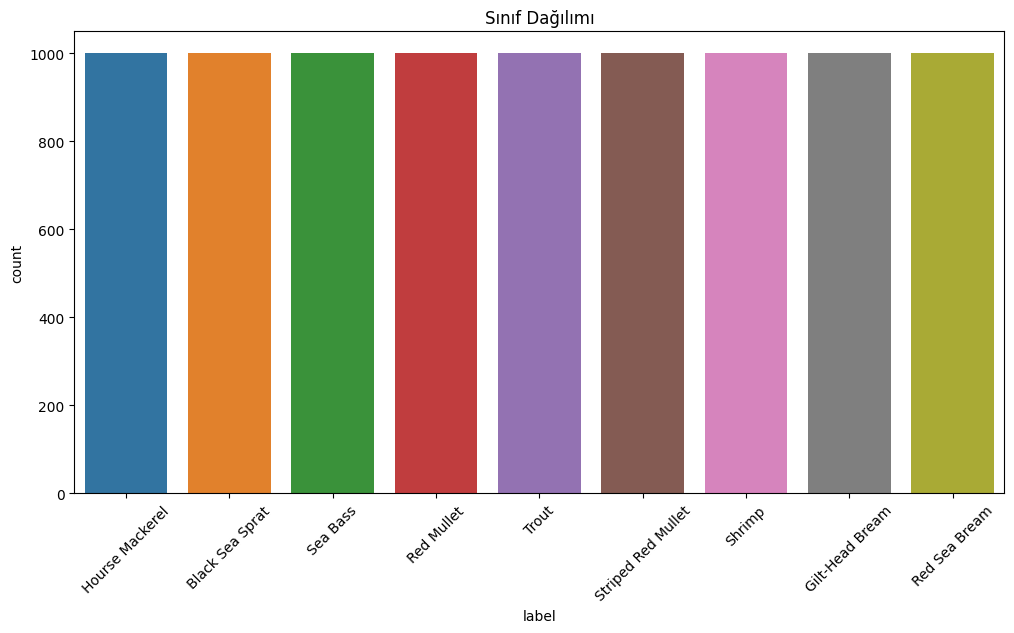

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sınıf dağılımını çubuk grafik olarak gösterme
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='label')
plt.title('Sınıf Dağılımı')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_94/2631255546.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_data = data.groupby('label', group_keys=False).apply(lambda x: x.sample(1)).reset_index(drop=True)  # Her sınıftan bir örnek al


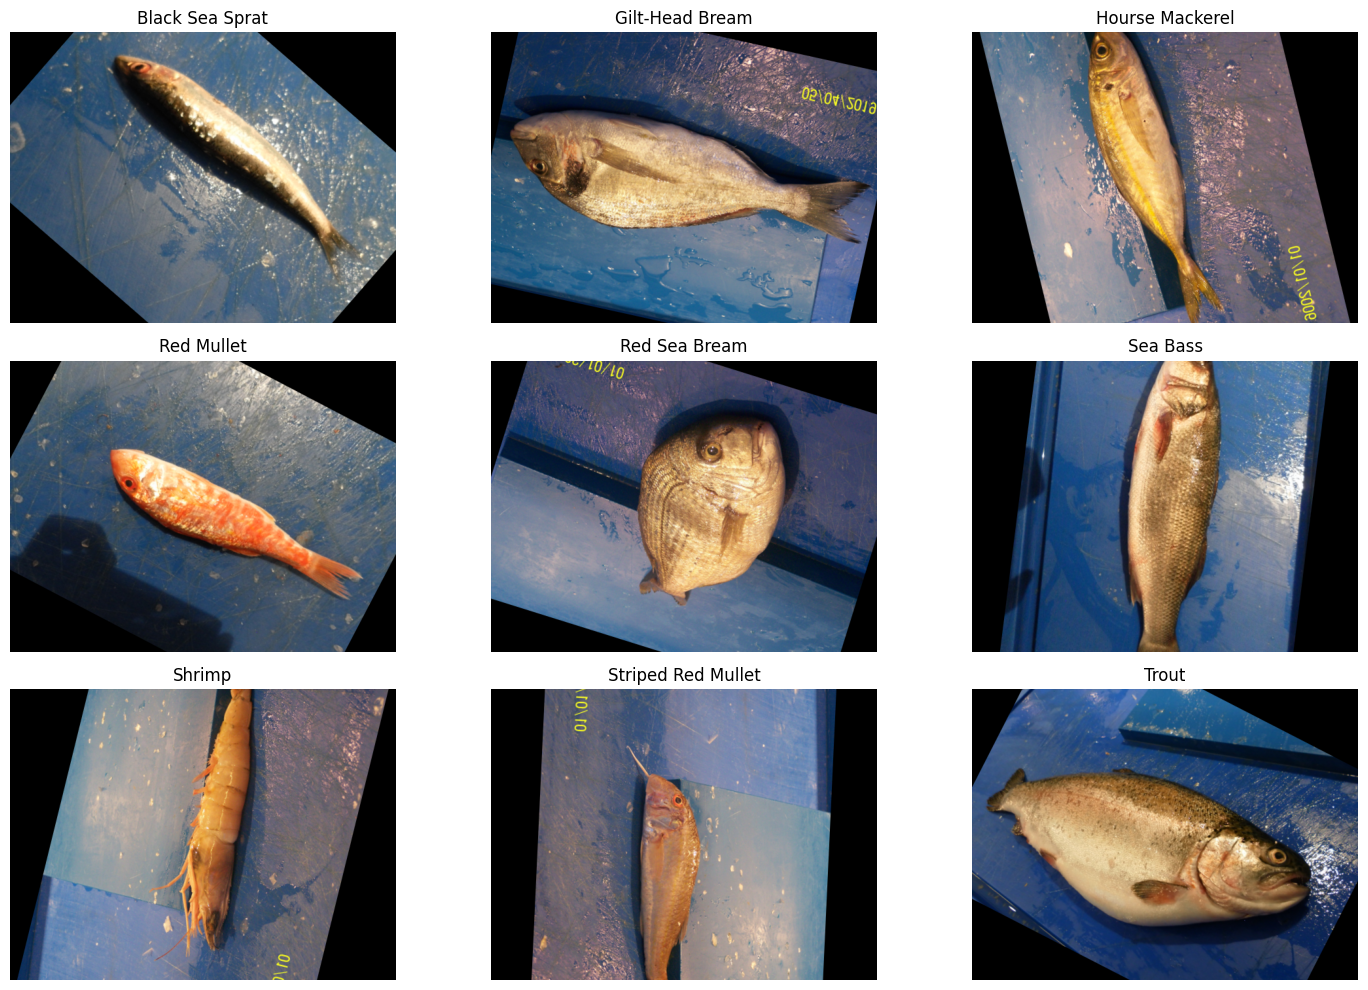

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images(image_paths, titles, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
    for indx, ax in enumerate(axes.flat):
        img = mpimg.imread(image_paths[indx])
        ax.imshow(img)
        ax.set_title(titles[indx])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Her sınıftan birer örnek seçmek
sample_data = data.groupby('label', group_keys=False).apply(lambda x: x.sample(1)).reset_index(drop=True)  # Her sınıftan bir örnek al
sample_images = sample_data['path'].values  # Görüntü yollarını al
sample_labels = sample_data['label'].values  # Etiketleri al

# Görüntüleri ve etiketlerini görselleştir
plot_images(sample_images, sample_labels, 3, 3)

In [37]:
from PIL import Image

# Görüntü boyutlarını kontrol et
image_sizes = data['path'].apply(lambda x: Image.open(x).size)
print(image_sizes.value_counts())

path
(590, 445)    9000
Name: count, dtype: int64


In [38]:
data['label'].value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

# Veri Setinin Eğitim ve Test için Bölünmesi
Veri setini eğitim, test ve doğrulama olmak üzere üç gruba ayırıyoruz. Bu adımda, veri setinin %80'i model eğitimi için kullanılırken, kalan %20'lik kısım test ve doğrulama verisi olarak ayrılmaktadır. Bu, modelin genel performansını değerlendirmek için önemlidir. Stratification, her bir sınıfın dengeli dağılımını sağlar.

In [39]:
from sklearn.model_selection import train_test_split

# %80 eğitim, %20 test/validation
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

# %15 test ve %5 validation olacak şekilde kalan veriyi bölmek
test_data, validation_data = train_test_split(temp_data, test_size=0.25, random_state=42, stratify=temp_data['label'])

# Veri Yükleme ve Hazırlama
Görüntüleri normalize etmek için ImageDataGenerator kullanıyoruz. Bu adımda tüm görüntüler 0-255 arasındaki piksel değerlerinden 0-1 arasına ölçekleniyor. Bu, modelin daha hızlı ve stabil öğrenmesi için önemlidir.

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim, Doğrulama ve Test Veri Akışları
Eğitim, doğrulama ve test veri setlerini akışlar halinde hazırlıyoruz. Bu akışlar, veri setindeki görüntüleri modelin öğrenebileceği hale getirir. batch_size, her adımda modelin kaç görüntü işleyeceğini belirtir. Ayrıca, shuffle=False ile test veri setinin sırasını koruyoruz.

In [41]:
# Eğitim, doğrulama ve test generatörleri
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=validation_data,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 7200 validated image filenames belonging to 9 classes.
Found 450 validated image filenames belonging to 9 classes.
Found 1350 validated image filenames belonging to 9 classes.


# Yapay Sinir Ağı (ANN) Modeli Tanımlama
Bu modelde, ANN yapısını kullanıyoruz. Giriş katmanı olarak (224, 224, 3) boyutunda bir görüntü kabul ediliyor ve daha sonra Flatten() katmanı ile bu görüntü vektöre dönüştürülüyor.
Gizli katmanlarda relu aktivasyon fonksiyonu ve dropout işlemleri kullanılarak modelin genelleme kapasitesi artırılıyor. 
Çıktı katmanında softmax aktivasyon fonksiyonu kullanılarak sınıflandırma işlemi yapılıyor.

In [25]:
# Model Tanımlama
model_ann = Sequential([
    Input(shape=(224, 224, 3)),  # Giriş Katmanı
    Flatten(),  # 3D görüntüyü 1D vektöre dönüştürme

    # Gizli Katmanlar
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    # Çıktı Katmanı
    Dense(len(train_generator.class_indices), activation='softmax')
])


# Modelin Derlenmesi ve Erken Durdurma Tanımlama
Modelin derlenmesi için Adam optimizasyon algoritması kullanılıyor. categorical_crossentropy kayıp fonksiyonu ile çok sınıflı sınıflandırma hedefleniyor. EarlyStopping, doğrulama kaybında iyileşme gözlenmediğinde eğitimi durdurur ve en iyi ağırlıkları geri yükler. ModelCheckpoint ise en iyi doğrulama doğruluğuna sahip modeli kaydeder.

In [26]:
# Optimizer ve modelin derlenmesi
optimizer = Adam(learning_rate=0.0001)
model_ann.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Early Stopping ve Model Checkpoint tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


# Modelin Yapısı
Modelin katmanlarının yapısını ve her bir katmandaki parametrelerin sayısını görüntülemek için summary() fonksiyonu kullanılır. Bu özet, modelin mimarisi hakkında bilgi verir ve her katmanın çıktı boyutunu ve parametre sayısını gösterir.

In [32]:
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 1024)              154141696 
                                                                 
 batch_normalization_8 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_9 (Bat  (None, 512)               2048      
 chNormalization)                                     

#  Modelin Eğitimi
Modeli eğitim ve doğrulama verileriyle eğitiyoruz. Eğitim sürecinde doğrulama kaybı ve doğruluğu takip ederek modelin nasıl geliştiğini görüyoruz. Ben bu notebookta yeniden bir eğitim yaptım daha önce yaptığım eğiitimde overfitting süphesi vardı o yüzden yeniden bir eğitim gerçekleştirdim. Bir önceki notebooka : https://www.kaggle.com/code/dilarakoru/akbank-dl-bootcamp   buradan ulaşabilirsiniz.

In [27]:
# Model Eğitimi
history_ann = model_ann.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
450/450 [==============================] - 113s 243ms/step - loss: 2.5455 - accuracy: 0.2718 - val_loss: 1.7729 - val_accuracy: 0.4978
Epoch 2/50
450/450 [==============================] - 109s 243ms/step - loss: 2.0884 - accuracy: 0.3982 - val_loss: 1.5622 - val_accuracy: 0.5489
Epoch 3/50
450/450 [==============================] - 109s 243ms/step - loss: 1.8632 - accuracy: 0.4667 - val_loss: 1.3962 - val_accuracy: 0.5956
Epoch 4/50
450/450 [==============================] - 110s 245ms/step - loss: 1.7290 - accuracy: 0.5093 - val_loss: 1.2452 - val_accuracy: 0.6489
Epoch 5/50
450/450 [==============================] - 109s 242ms/step - loss: 1.5779 - accuracy: 0.5650 - val_loss: 1.2357 - val_accuracy: 0.6800
Epoch 6/50
450/450 [==============================] - 109s 242ms/step - loss: 1.4927 - accuracy: 0.5911 - val_loss: 1.0683 - val_accuracy: 0.7467
Epoch 7/50
450/450 [==============================] - 100s 222ms/step - loss: 1.3741 - accuracy: 0.6264 - val_loss: 2.5747 -

# Eğitim ve Doğrulama Performansının Görselleştirilmesi
Eğitim sürecinde kaydedilen kayıp ve doğruluk değerlerini grafiklerle gösteriyoruz. Bu, modelin nasıl öğrenme gösterdiğini ve overfitting olup olmadığını analiz etmek için kullanılır.
Elimizdeki grafikler için genel bir yorum yapacak olursak:
- Model, eğitim verisi üzerinde tutarlı bir öğrenme gösteriyor ve hatalarını azaltarak doğruluğunu artırıyor.
- Ancak, doğrulama verisi üzerindeki performansı daha dalgalı ve bazı dönemlerde doğrulama kaybı artarken doğrulama doğruluğu düşüyor. Bu durum, modelin eğitim verisine fazla adapte olması ve doğrulama verisine genelleme yaparken zorlanmasıyla ilişkili olabilir.
- Modelin genelleme yeteneğini artırmak için veri artırma (augmentation) yöntemlerinin iyileştirilmesi, dropout oranlarının yeniden ayarlanması veya modelin karmaşıklığının azaltılması gibi yöntemler değerlendirilebilir.

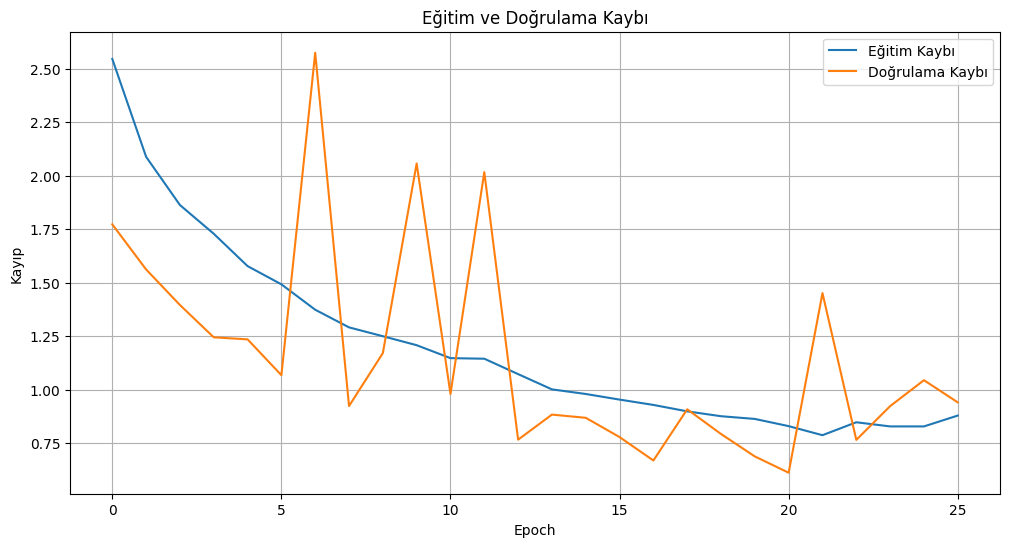

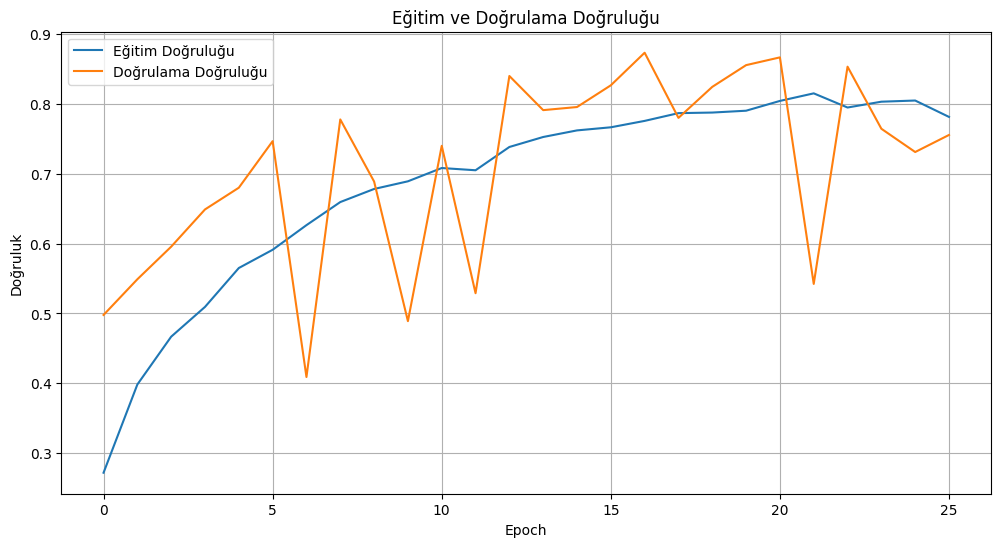

In [29]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kaybını çizdirme
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['loss'], label='Eğitim Kaybı')
plt.plot(history_ann.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()
plt.grid(True)
plt.show()

# Eğitim ve doğrulama doğruluğunu çizdirme
plt.figure(figsize=(12, 6))
plt.plot(history_ann.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history_ann.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()
plt.grid(True)
plt.show()

# Modelin Test Verisi Üzerindeki Performansının Değerlendirilmesi
Eğitim tamamlandıktan sonra, en iyi ağırlıklarla kaydedilen modeli yükleyip test verisi üzerinde değerlendiriyoruz. Bu, modelin gerçek dünya verileri üzerindeki performansını anlamamıza yardımcı olur.
Test verisindeki doğruluğu %88.3 ve kaybı 0.6431 olarak gerçekleşmiş. Bu, modelin genellikle iyi bir performans sergilediğini ve daha önce görmediği verilerde yüksek doğrulukla çalıştığını gösteriyor. Ancak kayıp değeri, modelin bazı örneklerde zorlandığını veya doğru tahminlere rağmen hatalar yaptığını işaret edebilir. Eğitim ve test doğrulukları arasındaki büyük bir fark olmaması, modelin aşırı öğrenme yapmadığını ve genelleme yeteneğinin makul seviyede olduğunu gösteriyor.

In [52]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [55]:
import tensorflow as tf

# Test işlemini CPU üzerinde çalıştırma
with tf.device('/CPU:0'):
    test_loss, test_accuracy = best_model.evaluate(test_generator)
    print(f'Test Loss: {test_loss}')
    print(f'Test Accuracy: {test_accuracy}')


85/85 [==============================] - 19s 216ms/step - loss: 0.6431 - accuracy: 0.8830
Test Loss: 0.6430657505989075
Test Accuracy: 0.8829629421234131


# Modelin Performansını Değerlendirme (Confusion Matrix ve Sınıflandırma Raporu)
Confusion matrix ve sınıflandırma raporu, modelin her sınıf için nasıl bir performans sergilediğini detaylı bir şekilde gösteriyor. Model, özellikle "Red Mullet" ve "Shrimp" sınıflarında yüksek doğrulukla tahmin yaparken, "Gilt-Head Bream" ve "House Mackerel" gibi sınıflarda daha fazla yanlış tahminde bulunmuş. Precision (kesinlik) ve recall (duyarlılık) değerleri genel olarak yüksek, ancak bazı sınıflarda bu değerlerin düşük olduğu görülüyor, bu da bu sınıfların diğerlerine karıştığını gösteriyor. Örneğin, "Red Mullet" sınıfında F1-skoru 0.85 gibi yüksek bir değer almışken, "Trout" sınıfında bu değer 0.78'e düşüyor. Genel doğruluk %88.30, bu da modelin genel olarak iyi bir performans sergilediğini ancak bazı sınıflar arasında karışıklık yaşandığını gösteriyor. Bu karışıklıkları azaltmak için veri setini daha da dengelemek, veri artırma yöntemleri uygulamak veya modelin karmaşıklığını artırmak gibi adımlar atılabilir.

85/85 [==============================] - 16s 183ms/step


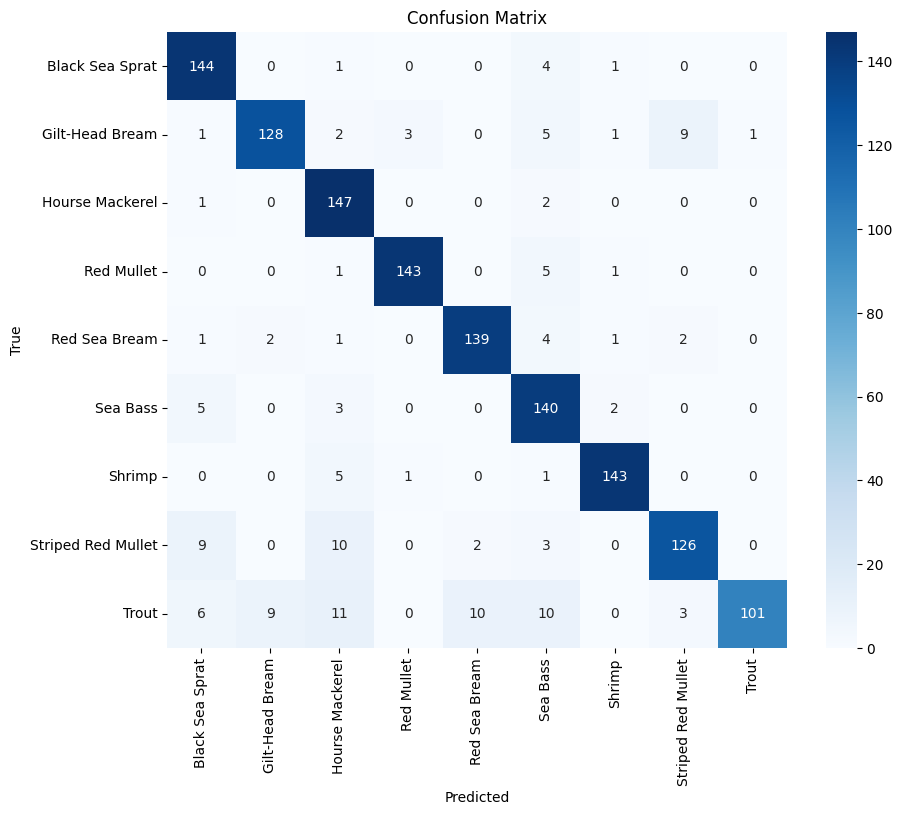

Classification Report:
                    precision    recall  f1-score   support

   Black Sea Sprat       0.86      0.96      0.91       150
   Gilt-Head Bream       0.92      0.85      0.89       150
   Hourse Mackerel       0.81      0.98      0.89       150
        Red Mullet       0.97      0.95      0.96       150
     Red Sea Bream       0.92      0.93      0.92       150
          Sea Bass       0.80      0.93      0.86       150
            Shrimp       0.96      0.95      0.96       150
Striped Red Mullet       0.90      0.84      0.87       150
             Trout       0.99      0.67      0.80       150

          accuracy                           0.90      1350
         macro avg       0.90      0.90      0.90      1350
      weighted avg       0.90      0.90      0.90      1350



In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Gerçek sınıf etiketlerini ve modelin tahminlerini alın
true_classes = test_generator.classes  # Test verisinin gerçek sınıfları
pred_probs = model_ann.predict(test_generator)  # Modelin tahmin olasılıkları
pred_classes = np.argmax(pred_probs, axis=1)  # En yüksek olasılığa sahip sınıf

# Sınıf isimlerinizi buraya ekleyin
class_labels = list(test_generator.class_indices.keys())

# Karışıklık Matrisi
conf_matrix = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporu
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print('Classification Report:')
print(report)

Bu aşamada yapmak istediğim şey, modeli bir fonksiyon içerisinde tanımlayıp ardından "Hyperband" gibi bir hiperparametre optimizasyon yöntemi kullanarak en iyi model yapılandırmasını belirlemekti. Bu tür bir yaklaşım, modelin farklı katman sayılarını, öğrenme hızlarını, katmanlardaki nöron sayılarını ve diğer parametreleri test ederek en iyi sonuçları veren modeli bulmamızı sağlar. Ancak, bu sürecin başarısız olmasının sebebi, GPU bellek yetersizliği ve belleği yönetme sorunlarından kaynaklandı. GPU belleği, büyük bir model ve geniş veri seti kullanıldığında hızla doluyor ve bu, belleği temizleyip yeniden yükleme gerektirdiğinden "Out of memory" hatası veriyor. Bu sorunu çözmek için daha küçük modeller kullanmak, batch size değerini azaltmak ve gerektiğinde belleği manuel olarak temizlemek önemliydi. Ancak, bu süreç sırasında bu adımların hepsini ne kadar denesem de başarılı olamadım.

In [31]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, SGD

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(224, 224, 3)))
    model.add(Flatten())

    # Dense katmanlarının sayısını optimize ediyoruz
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=64,
                                     max_value=1024,
                                     step=128),
                        activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_' + str(i),
                                   min_value=0.1,
                                   max_value=0.5,
                                   step=0.1)))

    # Çıktı katmanı
    model.add(Dense(len(train_generator.class_indices), activation='softmax'))

    # Optimizer'ı optimize etme
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Keras Tuner kullanarak optimizasyon yapıyoruz
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Tuner'ı başlat
tuner.search(train_generator, epochs=50, validation_data=validation_generator)

# En iyi hiperparametreleri al ve en iyi modeli oluştur
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

Trial 22 Complete [00h 00m 10s]

Best val_accuracy So Far: 0.8066666722297668
Total elapsed time: 00h 56m 00s

Search: Running Trial #23

Value             |Best Value So Far |Hyperparameter
4                 |2                 |num_layers
320               |960               |units_0
0.2               |0.2               |dropout_0
448               |576               |units_1
0.2               |0.3               |dropout_1
adam              |rmsprop           |optimizer
64                |320               |units_2
0.2               |0.3               |dropout_2
832               |64                |units_3
0.4               |0.3               |dropout_3
10                |4                 |tuner/epochs
0                 |2                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/10


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/eng

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/opt/conda/lib/python3.10/site-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.ResourceExhaustedError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall defined at (most recent call last):
  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code

  File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_94/430373116.py", line 44, in <module>

  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 234, in search

  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial

  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial

  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial

  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial

  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model

  File "/opt/conda/lib/python3.10/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

Out of memory while trying to allocate 385351940 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:  735.00MiB
              constant allocation:         8B
        maybe_live_out allocation:  551.25MiB
     preallocated temp allocation:  367.50MiB
  preallocated temp fragmentation:       124B (0.00%)
                 total allocation:    1.08GiB
Peak buffers:
	Buffer 1:
		Size: 183.75MiB
		XLA Label: fusion
		Shape: f32[150528,320]
		==========================

	Buffer 2:
		Size: 183.75MiB
		XLA Label: fusion
		Shape: f32[150528,320]
		==========================

	Buffer 3:
		Size: 183.75MiB
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[150528,320]
		==========================

	Buffer 4:
		Size: 183.75MiB
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[150528,320]
		==========================

	Buffer 5:
		Size: 183.75MiB
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[150528,320]
		==========================

	Buffer 6:
		Size: 183.75MiB
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[150528,320]
		==========================

	Buffer 7:
		Size: 24B
		Operator: op_type="AssignSubVariableOp" op_name="AssignSubVariableOp" source_file="/opt/conda/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1160
		XLA Label: fusion
		Shape: (f32[150528,320], f32[150528,320], f32[150528,320])
		==========================

	Buffer 8:
		Size: 16B
		XLA Label: fusion
		Shape: (f32[150528,320], f32[150528,320])
		==========================

	Buffer 9:
		Size: 8B
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: s64[]
		==========================

	Buffer 10:
		Size: 4B
		Operator: op_type="Pow" op_name="Pow_1" source_file="/opt/conda/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1160 deduplicated_name="fusion.4"
		XLA Label: fusion
		Shape: f32[]
		==========================

	Buffer 11:
		Size: 4B
		Operator: op_type="Pow" op_name="Pow" source_file="/opt/conda/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1160 deduplicated_name="fusion.4"
		XLA Label: fusion
		Shape: f32[]
		==========================

	Buffer 12:
		Size: 4B
		Operator: op_name="XLA_Args"
		Entry Parameter Subshape: f32[]
		==========================

	Buffer 13:
		Size: 4B
		Operator: op_type="Pow" op_name="Pow" source_file="/opt/conda/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1160
		XLA Label: constant
		Shape: f32[]
		==========================

	Buffer 14:
		Size: 4B
		Operator: op_type="Pow" op_name="Pow_1" source_file="/opt/conda/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1160
		XLA Label: constant
		Shape: f32[]
		==========================


	 [[{{node Adam/StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_174292]
